In [13]:
from mp_api.client import MPRester
from emmet.core.summary import HasProps
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import utils

api_key = 'Jy8KgNH5XRyGoHYK6ANxnBmgqFVvtOaN'

In [14]:
#df = pd.read_csv('/Users/jshi7/Downloads/preliminary_data.csv')
path = 'preliminary_data.csv'
df = np.genfromtxt(path, delimiter=',', skip_header=1, dtype=float, missing_values=['', 'NA', 'N/A', 'nan', 'NAN'])

data = df[:, 2:]
X = data[:, :-1]  # polymer features (band_gap,a,b,c,alpha,beta,gamma)
y = data[:, -1]  # piezoelectricity values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train).view(-1, 1)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test).view(-1, 1)
print(y)

[0.95523083 4.50082    0.43313924 ... 0.24329149 0.31601    0.83639358]


In [15]:
class NeuralNetwork(nn.Module):
   def __init__(self, input_dim):
      super(NeuralNetwork, self).__init__()
      self.layer1 = nn.Linear(input_dim, 64)
      self.layer2 = nn.Linear(64, 1)
      self.relu = nn.ReLU()
      self.sigmoid = nn.Sigmoid()
        
   def forward(self, x):
      x = self.sigmoid(self.layer1(x))
      x = self.relu(self.layer2(x))
      return x

input_dim = X_train.shape[1]
model = NeuralNetwork(input_dim)

Epoch 0/1000 Loss: 17.086408615112305
Epoch 100/1000 Loss: 17.084304809570312
Epoch 200/1000 Loss: 17.08235740661621
Epoch 300/1000 Loss: 17.080554962158203
Epoch 400/1000 Loss: 17.078880310058594
Epoch 500/1000 Loss: 17.07732582092285
Epoch 600/1000 Loss: 17.075878143310547
Epoch 700/1000 Loss: 17.074522018432617
Epoch 800/1000 Loss: 17.073259353637695
Epoch 900/1000 Loss: 17.07207489013672


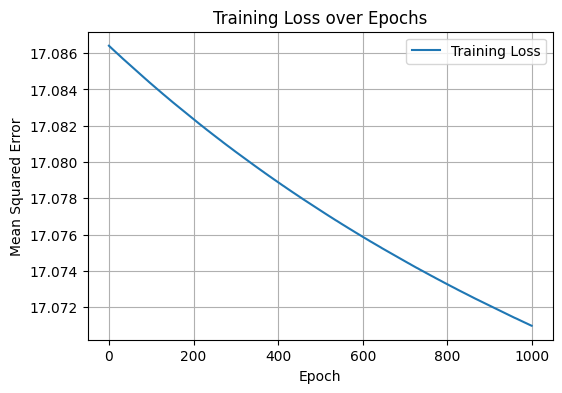

In [20]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)
# optimizer = optim.Adam(model.parameters(), lr=0.001)

loss_values = []

epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    predictions = model(X_train_tensor)
    loss = criterion(predictions, y_train_tensor)
    loss.backward()
    optimizer.step()
    loss_values.append(loss.item())
        
    if epoch % 100 == 0:
        print(f"Epoch {epoch}/{epochs} Loss: {loss.item()}")

    model.eval()
    with torch.no_grad():
        test_predictions = model(X_test_tensor)
        loss = criterion(test_predictions, y_test_tensor)

plt.figure(figsize=(10, 5))
plt.plot(loss_values, label='Training Loss')
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid(True)
plt.show()
# np.savetxt('loss_values_nn_SGD_normal.csv', loss_values, delimiter=',')
# np.savetxt('loss_values_nn_Adam_normal.csv', loss_values, delimiter=',')


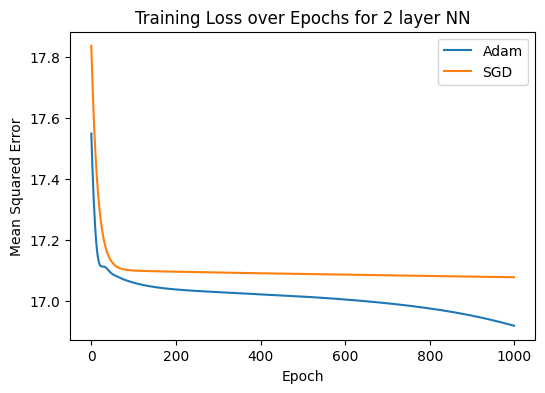

In [24]:
plt.figure(figsize=(6, 4))
#plot loss values for Adam and SGD
# to get csvs, uncomment the lines from the previous block to save the loss values
loss_values_Adam = np.genfromtxt('loss_values_nn_Adam_normal.csv', delimiter=',')
loss_values_SGD = np.genfromtxt('loss_values_nn_SGD_normal.csv', delimiter=',')
plt.plot(loss_values_Adam, label='Adam')
plt.plot(loss_values_SGD, label='SGD')
plt.title("Training Loss over Epochs for 2 layer NN")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.savefig('loss_values_nn_Adam_SGD_normal.png')



Predicting piezoelectricity using Random Forests

/Users/sonnyyoung/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/sonnyyoung/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/sonnyyoung/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/sonnyyoung/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/sonnyyoung/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_

After 1 trees, OOB error: 2.833309897127096
After 2 trees, OOB error: 3.6403396750820347
After 3 trees, OOB error: 12.74137496076112
After 4 trees, OOB error: 14.65012249957925
After 5 trees, OOB error: 12.200123157559585
After 6 trees, OOB error: 13.294354092762823
After 7 trees, OOB error: 11.254356892884223
After 8 trees, OOB error: 7.404860483810432
After 9 trees, OOB error: 6.611038210443379
After 10 trees, OOB error: 7.066049402431406
After 11 trees, OOB error: 7.520469710585085
After 12 trees, OOB error: 7.136508086302906
After 13 trees, OOB error: 6.723413428156064


/Users/sonnyyoung/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/sonnyyoung/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/sonnyyoung/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/sonnyyoung/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/sonnyyoung/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_

After 14 trees, OOB error: 6.625911206306173
After 15 trees, OOB error: 6.8945437332398205
After 16 trees, OOB error: 6.877813540682315
After 17 trees, OOB error: 6.889324876297945
After 18 trees, OOB error: 5.991697655351078
After 19 trees, OOB error: 6.233674625945134
After 20 trees, OOB error: 6.059100978552486
After 21 trees, OOB error: 6.012098800937579
After 22 trees, OOB error: 5.890556196500005
After 23 trees, OOB error: 5.602035759603147
After 24 trees, OOB error: 5.389134092366323
After 25 trees, OOB error: 5.53716775587244
After 26 trees, OOB error: 5.300182309343326
After 27 trees, OOB error: 5.41553208956732
After 28 trees, OOB error: 5.25849828344973
After 29 trees, OOB error: 5.48435623508594
After 30 trees, OOB error: 5.377377581412182
After 31 trees, OOB error: 5.394926493827506
After 32 trees, OOB error: 5.146962745833637
After 33 trees, OOB error: 4.986709073286056
After 34 trees, OOB error: 5.1656034758867
After 35 trees, OOB error: 5.1281716139871945
After 36 trees

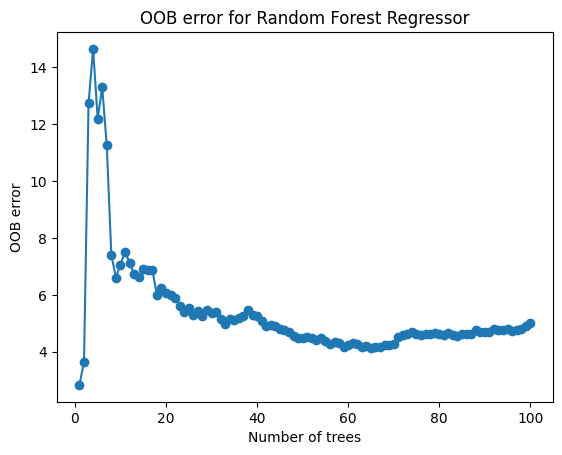

In [18]:
rf = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=1, warm_start=True)

oob_errors = []

for i in range(1, 101):  # Assuming you want 100 trees
    rf.set_params(n_estimators=i)
    rf.fit(X_train, y_train.ravel())
    
    oob_error = mean_squared_error(y_train, (y_train - rf.oob_prediction_))
    oob_errors.append(oob_error)
    
    print(f"After {i} trees, OOB error: {oob_error}")

# np.savetxt('loss_values_rf.csv', oob_errors, delimiter=',')
plt.plot(range(1, 101), oob_errors, marker='o')
plt.xlabel('Number of trees')
plt.ylabel('OOB error')
plt.title('OOB error for Random Forest Regressor')
# plt.savefig('rf_OOB_error.png')
plt.show()